# TP STUDENT_PERFORMANCE GROUPE 06 PREDICTION

In [1]:
import numpy as np 
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.metrics import *

# Algorithme pour la classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

#Algorithme pour la régression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import BayesianRidge

import warnings
warnings.filterwarnings('ignore')

In [2]:
filter

filter

In [3]:
#  clf = Perceptron(fit_intercept=False, max_iter=10, tol=None,
# ...                  shuffle=False).fit(X, y)
#
#  reg = linear_model.BayesianRidge()

In [4]:
# Importation du dataset 

data = pd.read_csv('dataset/StudentsPerformance.csv')

In [5]:
#Petite aperçu du jeu de données

data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
#Nous observons qu'il y'a pas de données manquantes dans notre jeu de données
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
# Lignes dupliquées aucune alors le dataset est pret pour l'analyse univariée 
data.duplicated().sum()

0

### Identfication du problème Classification ou Régression ??

In [8]:
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [9]:
#Afficher les différentes valeur qui existe dans la variable writing score

data['writing score'].unique()

array([ 74,  88,  93,  44,  75,  78,  92,  39,  67,  50,  52,  43,  73,
        70,  58,  86,  28,  46,  61,  63,  53,  80,  72,  55,  65,  38,
        82,  79,  83,  59,  57,  54,  68,  66,  62,  76,  48,  42,  87,
        49,  10,  34,  71,  37,  56,  41,  22,  81,  45,  36,  89,  47,
        90, 100,  64,  98,  51,  40,  84,  69,  33,  60,  85,  91,  77,
        27,  94,  95,  19,  35,  32,  96,  97,  99,  15,  30,  23],
      dtype=int64)

In [10]:
# Affichons le nombre des différentes notes qui exist dans cette colonne

data['writing score'].unique().shape[0]

77

### Avant de diviser les données il faut transformer les valeurs catégorielles en valeur numériques allons-y

In [11]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [12]:
#Conversion du genre en version numérique
data['gender_n'] = 0

# Les male seront remplacer par la valeur numérique 1
# Les female seront remplacer par la valeur numérique 0

data.loc[ data['gender'] == 'male' , 'sex' ] = 1
data.loc[ data['gender'] == 'female', 'sex'  ] = 0

In [13]:
data['race/ethnicity_n'] = 0

data.loc[ data['race/ethnicity'] == 'group A' , 'race/ethnicity_n' ] = 0
data.loc[ data['race/ethnicity'] == 'group B' , 'race/ethnicity_n' ] = 1
data.loc[ data['race/ethnicity'] == 'group C' , 'race/ethnicity_n' ] = 2
data.loc[ data['race/ethnicity'] == 'group D' , 'race/ethnicity_n' ] = 3
data.loc[ data['race/ethnicity'] == 'group E' , 'race/ethnicity_n' ] = 4

In [14]:
data['parental level of education_n'] = 0

data.loc[ data['parental level of education'] == 'bachelor\'s degree' , 'parental level of education_n' ] = 0
data.loc[ data['parental level of education'] == 'some college' , 'parental level of education_n' ] = 1
data.loc[ data['parental level of education'] == 'master\'s degree' , 'parental level of education_n' ] = 2
data.loc[ data['parental level of education'] == 'associate\'s degree' , 'parental level of education_n' ] = 3
data.loc[ data['parental level of education'] == 'high school' , 'parental level of education_n' ] = 4
data.loc[ data['parental level of education'] == 'some high school' , 'parental level of education_n' ] = 5

In [15]:
data['lunch_n'] = 0

data.loc[ data['lunch'] == 'standard' , 'lunch_n' ] = 0
data.loc[ data['lunch'] == 'free/reduced' , 'lunch_n' ] = 1

In [16]:
data['test preparation course_n'] = 0

data.loc[ data['test preparation course'] == 'none' , 'test preparation course_n' ] = 0
data.loc[ data['test preparation course'] == 'completed' , 'test preparation course_n' ] = 1

# SELECTIONNONS LES VARIABLE NUMERIQUE POUR LA SUITE DU PRE-TRAITEMENT

In [17]:
col = ['gender_n','race/ethnicity_n',
       'parental level of education_n','lunch_n',
       'test preparation course_n',
       'writing score',
       'reading score',
       'math score'
      ]

data = data[col]

In [18]:
data.columns

Index(['gender_n', 'race/ethnicity_n', 'parental level of education_n',
       'lunch_n', 'test preparation course_n', 'writing score',
       'reading score', 'math score'],
      dtype='object')

In [19]:
data.head()

,gender_n,race/ethnicity_n,parental level of education_n,lunch_n,test preparation course_n,writing score,reading score,math score
0,0,1,0,0,0,74,72,72
1,0,2,1,0,1,88,90,69
2,0,1,2,0,0,93,95,90
3,0,0,3,1,0,44,57,47
4,0,2,1,0,0,75,78,76


### Les valeurs de writing score sont entière donc on parle de probléme de classiffication dans les normes mais vu le nombre de classe a concevoir... ce qui ne sera pas chose facile

### Dans un prémier temps nous allons le traiter comme un problème de classification parce que les note sont Quantitative discret 

### Ensuite comme un problème de régression car nous avons 77 classe, quand nous avons autant de classe il faut penser a un problème de régression et comparer les 2 résultats obtenue(soit classification ou régression)

# DIVISION DES DONNEES EN TRAIN ET TEST SET 

In [20]:
y = data['writing score']
X = data.drop('writing score',axis=1)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state=11,
                                                    shuffle=True
                                                    )

In [22]:
print('X_Train set',X_train.shape)
print('X_Test set',X_test.shape)

X_Train set (800, 7)
X_Test set (200, 7)


In [23]:
print('y_train set',y_train.shape)
print('y_test set',y_test.shape)

y_train set (800,)
y_test set (200,)


Text(0.5, 1.0, 'Test set')

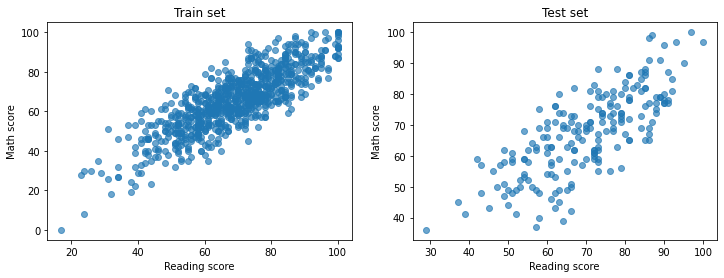

In [24]:
plt.figure(figsize=(12,4))

plt.subplot(121)
plt.scatter(X_train['reading score'],X_train['math score'],alpha=0.65)
plt.xlabel('Reading score')
plt.ylabel('Math score')
plt.title('Train set')

plt.subplot(122)
plt.scatter(X_test['reading score'],X_test['math score'],alpha=0.65)
plt.xlabel('Reading score')
plt.ylabel('Math score')
plt.title('Test set')

### Pour me rassurer ci je dois utiliser un modèle j'évalue d'abord si l'entrainement avec c'est propres données d'entrainement est au moins supérieur a 90%

In [25]:
neighbors = KNeighborsClassifier(n_neighbors=3)
neighbors.fit(X_train,y_train)

print('Train score',neighbors.score(X_train,y_train)*100 )
print('Test score',neighbors.score(X_test,y_test)*100 )

Train score 40.25
Test score 7.5


In [26]:
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)

print('Train score',tree.score(X_train,y_train)*100 )
print('Test score',tree.score(X_test,y_test)*100 )

Train score 99.5
Test score 9.0


In [27]:
naive = GaussianNB()
naive.fit(X_train,y_train)

print('Train score',naive.score(X_train,y_train)*100 )
print('Test score',naive.score(X_test,y_test)*100 )

Train score 15.875
Test score 10.0


In [28]:
svc = SVC()
svc.fit(X_train,y_train)

print('Train score',svc.score(X_train,y_train)*100 )
print('Test score',svc.score(X_test,y_test)*100 )

Train score 7.124999999999999
Test score 7.5


In [29]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

print('Train score',rfc.score(X_train,y_train)*100 )
print('Test score',rfc.score(X_test,y_test)*100 )

Train score 99.5
Test score 4.0


### Nous pouvons le constater que même le score d'entrainement sur les propres données d'entrainement sont pas 100% pire encore le score de test qui ne depasse pas les 20%

### Alors prennont ce problème comme un problèmes de régression

In [30]:
linear = LinearRegression()
linear.fit(X_train,y_train)

print('Train score',linear.score(X_train,y_train)*100 )
print('Test score',linear.score(X_test,y_test)*100 )

f = np.array([0,1,0,0,0,72,72]).reshape(1,7)
linear.predict(f)

Train score 92.66047359098746
Test score 91.50454493180536


array([71.39176077])

In [31]:
logistic = LogisticRegression(max_iter=770)
logistic.fit(X_train,y_train)

print('Train score',logistic.score(X_train,y_train)*100 )
print('Test score',logistic.score(X_test,y_test)*100 )

Train score 13.5
Test score 6.5


In [32]:
svr = SVR()
svr.fit(X_train,y_train)

print('Train score',svr.score(X_train,y_train)*100 )
print('Test score',svr.score(X_test,y_test)*100)

f = np.array([0,1,0,0,0,72,72]).reshape(1,7)
svr.predict(f)

Train score 88.46044992158329
Test score 88.59002375351088


array([71.87572722])

In [33]:
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)

print('Train score',rfr.score(X_train,y_train)*100 )
print('Test score',rfr.score(X_test,y_test)*100)

#cross_val_score(rfr,X_train,y_train,cv=5,scoring='accuracy')

f = np.array([0,1,0,0,0,72,72]).reshape(1,7)
rfr.predict(f)

Train score 98.74264694921813
Test score 89.97027781457189


array([72.73])

In [34]:
reg_tree = DecisionTreeRegressor()
reg_tree.fit(X_train,y_train)

print('Train score',reg_tree.score(X_train,y_train)*100 )
print('Test score',reg_tree.score(X_test,y_test)*100)

#cross_val_score(reg_tree,X_train,y_train,cv=5,scoring='accuracy')

f = np.array([0,1,0,0,0,72,72]).reshape(1,7)
reg_tree.predict(f)

Train score 99.94618588347439
Test score 81.88523176978289


array([74.])

In [35]:
knr = KNeighborsRegressor(10)
knr.fit(X_train,y_train)

print('Train score',knr.score(X_train,y_train)*100 )
print('Test score',knr.score(X_test,y_test)*100)

cross_val_score(knr,X_train,y_train,cv=5,scoring='precision')

f = np.array([0,1,0,0,0,72,72]).reshape(1,7)
knr.predict(f)

Train score 92.3127033308149
Test score 89.11183828193596


array([72.7])

In [36]:
perceptron = Perceptron()
perceptron.fit(X_train,y_train)

print('Train score',perceptron.score(X_train,y_train)*100 )
print('Test score',perceptron.score(X_test,y_test)*100)

#cross_val_score(perceptron,X_train,y_train,cv=5)

f = np.array([0,1,0,0,0,72,72]).reshape(1,7)
perceptron.predict(f)

Train score 1.125
Test score 1.0


array([92], dtype=int64)

### Le score de test est de 100% ça fait peur et surtout je suis entrain d'humé le surapprentissage...

## Continuons avec les algorithme de BayesianRidge

In [64]:
bay_reg = BayesianRidge()
bay_reg.fit(X_train,y_train)

print('Train score',bay_reg.score(X_train,y_train)*100 )
print('Test score ',bay_reg.score(X_test,y_test)*100)

Train score 92.65750514721663
Test score  91.519410758941


In [65]:
# Essayons de faire une validation croissé et observons les différent scores obtenu
cross = cross_val_score(bay_reg,X_train,y_train,cv=5)

#cross = cross_val_score(bay_reg,X_train,y_train,cv=5).mean()
#cross_val_score(bay_reg,X_train,y_train,cv=5,scoring='recall')
#cross_val_score(bay_reg,X_train,y_train,cv=5,scoring='precision')

print('\nCross Validation',cross)


Cross Validation [0.92274797 0.91552587 0.92710665 0.92264137 0.93193596]


In [66]:
#Traçon la validation curve pour 
k = np.linspace(0.0001,0.01,100)
train_score, val_score = validation_curve(bay_reg,X_train,y_train,
                                          cv=3,param_name='tol',
                                          param_range=k
                                         )

print('\nAverage train score',train_score.mean())
print('Average validation score',val_score.mean())
print(val_score.shape)


Average train score 0.9267898970900175
Average validation score 0.9234573051118254
(100, 3)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


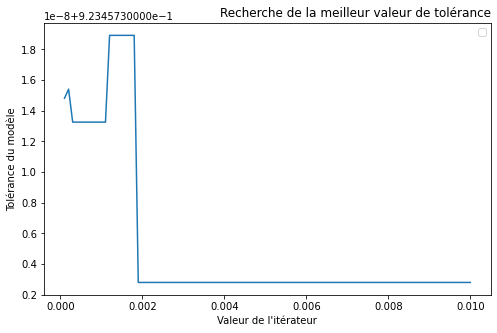

In [71]:
# Alors observons cette graphique pour 
#connaitre la meilleur valeur que doit contenir l'hyper parametres tol

plt.figure(figsize=(8,5))
plt.plot(k, val_score.mean(axis=1))
plt.xlabel('Valeur de l\'itérateur')
plt.ylabel('Tolérance du modèle')
plt.title('Recherche de la meilleur valeur de tolérance',loc='right')
plt.legend()
plt.show()

### Nous observons que la ligne est constante a partir de 0.002 pour notre valeur de tol(tolerance ou encore appeler learning rate)

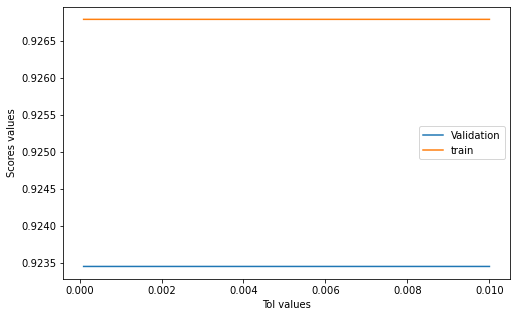

In [75]:
# Traçons les valeur moyenne des train score et val_score pour voir 
#si il y'a surapprentissage ou sous apprentissage
plt.figure(figsize=(8,5))


plt.plot(k, val_score.mean(axis=1), label='Validation'  )
plt.plot(k,train_score.mean(axis=1), label='train')
plt.legend()

plt.xlabel('Tol values')
plt.ylabel('Scores values')
plt.show()



In [42]:
# Utilison la bibliothèque GridSearchCV pour obtenir les meilleures hyperparametre

param_grid = {'tol':np.linspace(0.01,0.005,50),}


grid = GridSearchCV(bay_reg, param_grid, cv=5)
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=BayesianRidge(),
             param_grid={'tol': array([0.01      , 0.00989796, 0.00979592, 0.00969388, 0.00959184,
       0.0094898 , 0.00938776, 0.00928571, 0.00918367, 0.00908163,
       0.00897959, 0.00887755, 0.00877551, 0.00867347, 0.00857143,
       0.00846939, 0.00836735, 0.00826531, 0.00816327, 0.00806122,
       0.00795918, 0.00785714, 0.0077551 , 0.00765306, 0.00755102,
       0.00744898, 0.00734694, 0.0072449 , 0.00714286, 0.00704082,
       0.00693878, 0.00683673, 0.00673469, 0.00663265, 0.00653061,
       0.00642857, 0.00632653, 0.00622449, 0.00612245, 0.00602041,
       0.00591837, 0.00581633, 0.00571429, 0.00561224, 0.0055102 ,
       0.00540816, 0.00530612, 0.00520408, 0.00510204, 0.005     ])})

In [43]:
print('Best estimator :',grid.best_estimator_)
print('Best params :',grid.best_params_)
print('Best score :',grid.best_score_)

Best estimator : BayesianRidge(tol=0.006530612244897959)
Best params : {'tol': 0.006530612244897959}
Best score : 0.9239915949952092


In [44]:
bay_reg = BayesianRidge(tol=0.006530612244897959)
bay_reg.fit(X_train,y_train)

print('Train score',bay_reg.score(X_train,y_train)*100 )
print('Test score ',bay_reg.score(X_test,y_test)*100)

Train score 92.65750466562781
Test score  91.51941166975809


### Ecriture de la fonction qui va nous permettre de prédire la valeur de la note writing score

In [80]:
def predict_writin_score(bay_reg,
                         gender_n=1,
                         race_ethnicity_n=4,
                         parental_level_of_education_n=1,
                         lunch_n=0,
                         test_preparation_course_n=1,
                         reading_score=73,
                         math_score=60):
    
    x = np.array([gender_n,race_ethnicity_n,
                  parental_level_of_education_n,
                  lunch_n,
                  test_preparation_course_n,
                  reading_score, 
                  math_score]).reshape(1,7)
    
    score = np.rint(bay_reg.predict(x))
                    
    print(score.astype(int))
    #print(bay_reg.predict_proba(x))

In [46]:
predict_writin_score(bay_reg,0,0,0,0,0,85,70)

[83]


### Nous ne pouvons pas avoir une matrix de confusion dans notre cas car c'est pas un problème de classification

In [81]:
N, train_score,val_score = learning_curve(bay_reg, 
                                          X_train, 
                                          y_train, 
                                          train_sizes=np.linspace(0.1,1.0,10),
                                          cv=5
                                         )

In [82]:
print('Differente taille des X_train :',N)

Differente taille des X_train : [ 64 128 192 256 320 384 448 512 576 640]


In [83]:
print('Score moyen des différent entrainement respective:',train_score.mean())

Score moyen des différent entrainement respective: 0.9203934510468217


In [84]:
print('Validation Score moyen des différent entrainement respective:',val_score.mean())

Validation Score moyen des différent entrainement respective: 0.9227432219125465


### L'une des l'interpretation qu'on peut tirer d'un learning curve est de connaitre le nombre de points necessaires pour bien entrainer notre modèle, ou la cpourbe d'apprentissage sera collinéaire avec la courbe de validation

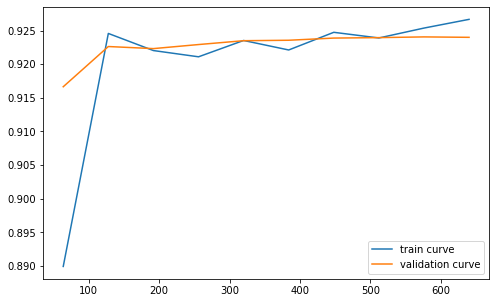

In [86]:
plt.figure(figsize=(8,5))

plt.plot(N,train_score.mean(axis=1),label='train curve')
plt.plot(N,val_score.mean(axis=1), label='validation curve')
plt.legend()
plt.show()

### Ici nous observons que la courbe d'apprentissage et la courbe de validation ne se confonde pas(ne sont pas collinéaire) jusqu'a 600point 

### Donc nous pouvons encore ou devons augmenter nos données pour avoir assez d'observations pour avoir une meilleures performance du modèle

# EVALUONS LES DIFFERENTES METRIC DE REGRESSION D'UN MODELE

In [114]:
y_pred = bay_reg.predict(X_train)
a = r2_score(y_train,y_pred)*100

print('Mean Absolute Error :',mean_absolute_error(y_train, y_pred) )
print('Mean Square Error :',mean_squared_error(y_train, y_pred) )
print('Root Mean Square Error :',np.sqrt(mean_squared_error(y_train, y_pred)) )
print('Median Absolute Error :',median_absolute_error(y_train, y_pred)) 
print('\nR_2 score',r2_score(y_train,y_pred)*100)

Mean Absolute Error : 3.368368776790724
Mean Square Error : 17.481605455051387
Root Mean Square Error : 4.181100985990579
Median Absolute Error : 2.838394462113378

R_2 score 92.65750514721663


In [115]:
y_pred2 = bay_reg.predict(X_test)
b = r2_score(y_test,y_pred2)*100

print('Mean Absolute Error :',mean_absolute_error(y_test, y_pred2) )
print('Mean Square Error :',mean_squared_error(y_test, y_pred2) )
print('Root Mean Square Error :',np.sqrt(mean_squared_error(y_test, y_pred2)) )
print('Median Absolute Error :',median_absolute_error(y_test, y_pred2)) 
print('\nR_2 score',r2_score(y_test,y_pred2)*100)

Mean Absolute Error : 3.272657038963226
Mean Square Error : 16.982462640965746
Root Mean Square Error : 4.120978359681806
Median Absolute Error : 2.877835386160754

R_2 score 91.519410758941


In [117]:


print('Diff Mean Absolute Error:              ',abs(mean_absolute_error(y_train, y_pred) - mean_absolute_error(y_test, y_pred2) )  )
print('Diff Mean Square Error:                ',abs( mean_squared_error(y_train, y_pred) - mean_squared_error(y_test, y_pred2)   ) )
print('Diff Root Mean Square Error:           ',abs( np.sqrt(mean_squared_error(y_train, y_pred)) - np.sqrt(mean_squared_error(y_test, y_pred2)) ) )
print('Diff Mean Absolute error:              ',abs(  median_absolute_error(y_train, y_pred) -  median_absolute_error(y_test, y_pred2)  ) )
print('\nDiff R2_Score:                         ',abs( a - b  ) )

Diff Mean Absolute Error:               0.09571173782749787
Diff Mean Square Error:                 0.49914281408564065
Diff Root Mean Square Error:            0.06012262630877263
Diff Mean Absolute error:               0.03944092404737631

Diff R2_Score:                          1.1380943882756185


#### 1.MSE pénalise beaucoup plus les grandes erreurs que la MAE
#### 2.MSE vous accordez une importance  plus aux grandes erreurs

#### 3. MAE l'importance d'une erreur est linéaire avec son amplitude. Si le Dataset contients des valeurs extrême(Outliers) comme notre jeu de données contient des outliers c'est cette metrique que nous allons utiliser est de 3.36

#### 4.Median Absolute error qui est peu très sensible au grandes erreurs 2.83

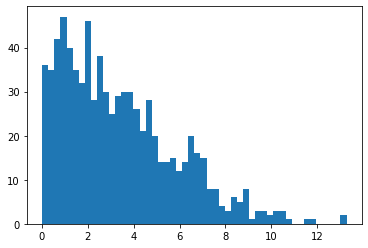

In [61]:
# Calculons l'érreur et affichons le sur un histogramme

err_hist = np.abs(y_train - y_pred)
plt.hist(err_hist,bins=50)
plt.show()

# TP STUDENT_PERFORMANCE GROUPE 06 PREDICTION